BL3TopAnalysis
============

This was a model including the 4-jaw slit, collimators c1 and C2 and then detectors at the 8m position of the neutron detector. For this model, both x and y jaws were closed down leaving a 1cm square from y=+1.5cm to y=+2.5cm, right at the top of the C1 collimator.

At the detector position are a position sensitive detector (psd), a full-coverage wavelength monitor (LMon), and a grid of 9 wavelength monitors with the central row and column being 1 cm wide/tall and the outer blocks 5 cm wide to ensure that they catch all the neutrons in their segment of the detector space.

We start by loading tools and reading in the output of the position sensitive detector.

In [1]:
import sys
sys.path.insert(0, '/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nspectrum import NSpectrum
from psd import PSDData

Load psd file BL3Front1cmTop/Blackbox.psd
Read 338 lines from BL3Front1cmTop/Blackbox.psd
Line 32 # Data [psd_monitor/Blackbox.psd] I:

Intensity block starts at line 33
Line 33 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Found 101 columns.
End of first block.
Line 133 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Line 134 # Errors [psd_monitor/Blackbox.psd] I_err:

error block starts at line 33
Found 101 rows.
<class 'numpy.ndarray'>
(2, 2)


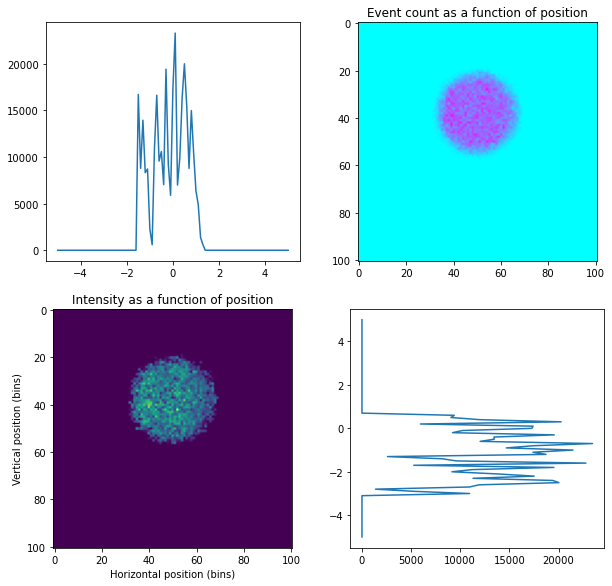

In [3]:
im1 = PSDData('BL3Front1cmTop/Blackbox.psd')
im1.plot()

We see that the counts somewhat to higher y positions due to lensing in the collimator, as expected. The spot is quite noisy indicating the relatively small total number of neutrons.

Next let's look at the overall spectrum.

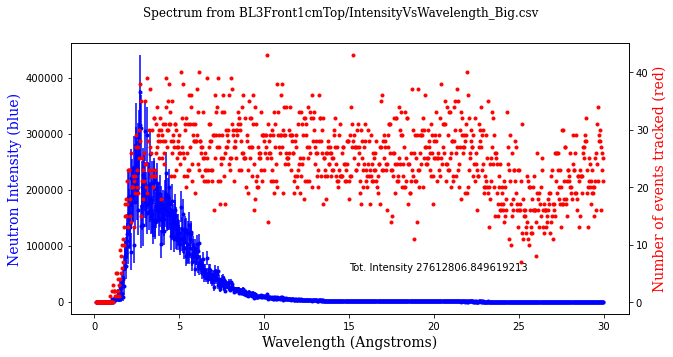

In [4]:
full = NSpectrum('BL3Front1cmTop/IntensityVsWavelength_Big.csv')
full.plot()

In [5]:
fullC1, fullEC = full.C1()
print(f'Full C1 = {fullC1}+-{fullEC} s')

Full C1 = 4.999255064697168+-0.0007186678102008223 s


That is a little lower than the C1 for the full beam, a hair above the value in the center, but well within the 0.1s limit.

Now we have to read in the 9 individual monitors.

In [7]:
mon = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(3):
    for j in range(3):
        print(f'Load LMon{i}{j}csv.dat')
        mon[i][j] = NSpectrum(f'BL3Front1cmTop/LMon{i}{j}csv.dat')

Load LMon00csv.dat
Load LMon01csv.dat
Load LMon02csv.dat
Load LMon10csv.dat
Load LMon11csv.dat
Load LMon12csv.dat
Load LMon20csv.dat
Load LMon21csv.dat
Load LMon22csv.dat


Now we would like to see what they look like.

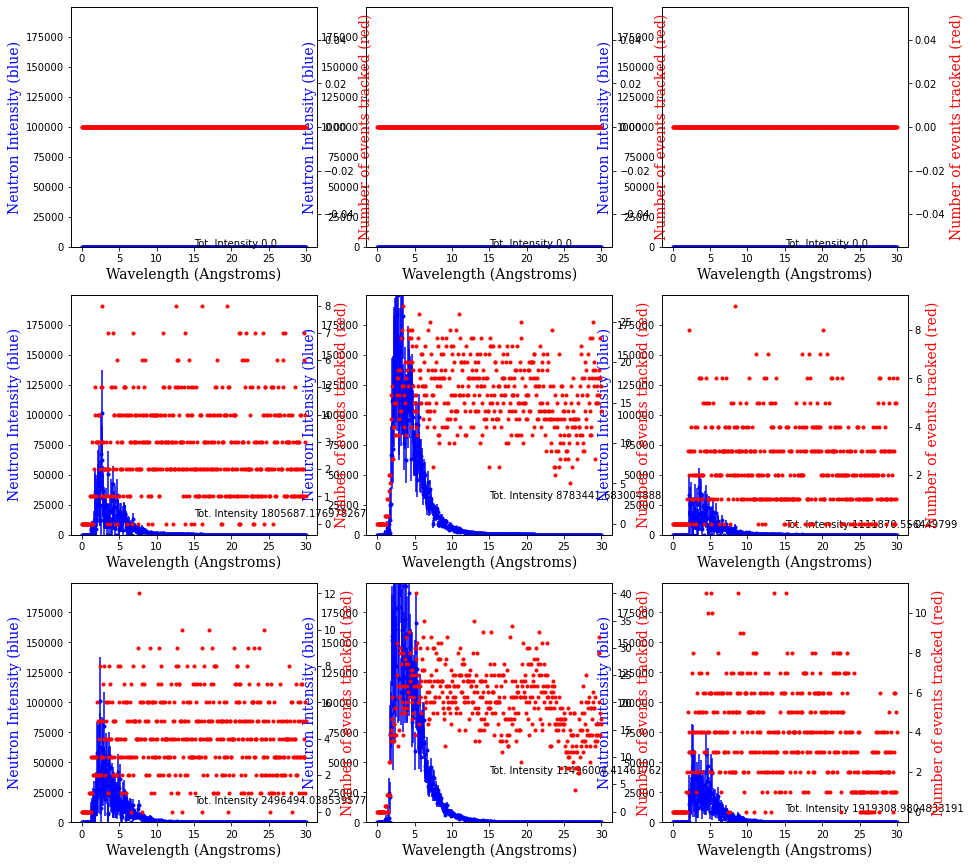

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
max = mon[1][1].max_inten
for i in range(3):
    for j in range(3):
        mon[i][j].plotOn(axes[i][j])
        axes[i][j].set_ylim(bottom=0.0, top=max)
# plt.tight_layout()

As expected from the Bl3Fromt1cmMiddle data and the motion of the spot, the peak intensity is now in the bottom center where we get about 11M neutrons in the spectrum. The intensities are reduced somewhat from the center 1cm spot because some of our square is now outside the view through the collimator.

So what does the bottom central C1 look like?

In [9]:
cc, ec = mon[2][1].C1()
print(f'{cc}+/-{ec}')

5.011637274751977+/-0.0012305820353353438


And that is VERY close to the full beam value of 5.013, only a 0.02s discrepancy.

I am really not sure what we are learning about the original mcstas simulation by looking at the discretization in the number of events plots (red dots) but I am sure that it is not good.